In [1]:
import os
#comment this if you are not using puffer?
os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import mne
import os
import sys
from mne.datasets import eegbci
import glob
from IPython.display import clear_output
import numpy as np
import torch
from torch import nn
import torch.optim as optim

from mne.datasets import eegbci
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from scipy import signal

import torch
import torch.cuda as cuda
import torch.nn as nn
from torch.autograd import Variable
import math


In [6]:
torch.cuda.is_available()

True

In [7]:
from common import EEG_fif
from common import create_dataloader

In [8]:
# home directory + datasets folder
#path = '/content/drive/MyDrive/MNE-eegbci-data/files/eegmmidb/'
path = ''
base_url = 'https://physionet.org/files/eegmmidb/'
# subjects = [1]
#runs = [3,4, 5,6, 7,8]
#runs = [3, 5, 7]
runs = [4, 6, 8]
subjects = [i for i in range(4,5)]
#subjects = [1]
# runs = [6,10,14]
print(path)
eeg = EEG_fif(path, base_url, subjects, runs)
raw=eeg.data_to_raw()

print("Raw done")
# apply filter
freq = (0., 45.)
raw=eeg.filter(freq=freq)
#raw=eeg.data_to_raw()
print("Filter done")
#raw=eeg.raw_ica()
#eeg.create_epochs()

/home/st122148/work/EEG-Motor-Imagery-Classification/common.py:466: RuntimeWarning: This filename (S004/S004R04.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif( path_file , preload=True, verbose='WARNING' )
/home/st122148/work/EEG-Motor-Imagery-Classification/common.py:466: RuntimeWarning: This filename (S004/S004R06.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif( path_file , preload=True, verbose='WARNING' )
/home/st122148/work/EEG-Motor-Imagery-Classification/common.py:466: RuntimeWarning: This filename (S004/S004R08.fif) does not conform to MNE naming conventions. A

Raw done
>>> Apply filter.
Filtering raw data in 3 contiguous segments
Setting up low-pass filter at 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 75 samples (0.300 sec)

Filter done


/home/st122148/work/EEG-Motor-Imagery-Classification/common.py:466: RuntimeWarning: This filename (S004/S004R08.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif( path_file , preload=True, verbose='WARNING' )
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


Effective window size : 8.192 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


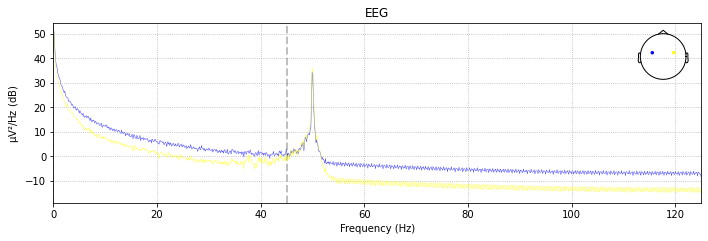

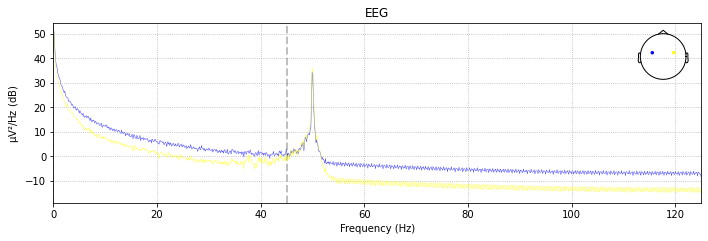

In [9]:
eeg.raw.plot_psd()

In [10]:
#X = X[:, :,np.newaxis,:]
X, y = eeg.get_X_y(raw)
print(X.shape)
y=y-1
y

144 events found
Event IDs: [1 2 4]
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 1001 original time points ...
0 bad epochs dropped
(72, 2, 1001)


/home/st122148/work/EEG-Motor-Imagery-Classification/common.py:487: RuntimeWarning: No matching events found for 3 (event id 3)
  epochs = mne.Epochs(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

print('train size',X_train.shape, y_train.shape)
print('Test size',X_test.shape, y_test.shape)

train size (50, 2, 1001) (50,)
Test size (22, 2, 1001) (22,)


In [12]:

batch_size = 32

train_loader = create_dataloader(X_train, y_train, batch_size=batch_size)
test_loader = create_dataloader(X_test, y_test, batch_size=batch_size)

num_step =math.ceil(len(train_loader.dataset) / batch_size)

In [13]:
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        #using sequential helps bind multiple operations together
        self.layer1 = nn.Sequential(
            #padding = (kernel_size - 1) / 2 = 2
            nn.Conv1d(2, 64, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            # nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv1d(64, 128, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            # nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc = nn.Linear(128128, 2)
        self.drop_out = nn.Dropout(0.5)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.drop_out(out)
        out = self.layer2(out)
        out = self.drop_out(out)
        out = out.reshape(out.size(0), -1)   #can also use .view()
        out = self.fc(out)
        return out

In [14]:
import wandb
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /home/st122148/.netrc


True

In [23]:

wand = wandb.init(
        
      # Set the project where this run will be logged
      project="Motor-Imagery", 
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"OurData_CNN_2ch_2class_IM", 
      # Track hyperparameters and run metadata
      config={
      "learning_rate": 0.00001,
      "architecture": "CNN",
      "dataset": "Nutapol T.",
      "epochs": 20000,
      "weightname":"OurData_S004_CNN_2ch_2class_IM",
      "num_step_per_epoch" : num_step, 
        
      }
    )



In [24]:
config = wand.config
print(config.num_step_per_epoch)

2


In [25]:
from common import train

In [26]:
net = ConvNet().cuda(0)
optimizer = optim.Adam(net.parameters(), lr=config.learning_rate)
criterion = nn.CrossEntropyLoss()


train_loss,valid_loss,train_accuracy,valid_accuracy =train(
    model = net,
    gpu_num = 0,
    train_loader = train_loader,
    test_loader = test_loader,
    optimizer = optimizer  ,
    criterion = criterion ,
    wand = wand
         )


wandb.alert(
            title='Finish',
            text=f'Finishing training',
        )

Epoch 1/20000, Tr Loss: 0.8436, Tr Acc: 46.0000, Val Loss: 0.6936, Val Acc: 50.0000
Epoch 101/20000, Tr Loss: 0.3813, Tr Acc: 78.0000, Val Loss: 0.3020, Val Acc: 86.3636
Epoch 201/20000, Tr Loss: 0.2775, Tr Acc: 90.0000, Val Loss: 0.2561, Val Acc: 90.9091
Epoch 301/20000, Tr Loss: 0.1833, Tr Acc: 92.0000, Val Loss: 0.2470, Val Acc: 90.9091
Epoch 401/20000, Tr Loss: 0.1207, Tr Acc: 96.0000, Val Loss: 0.2357, Val Acc: 90.9091
Epoch 501/20000, Tr Loss: 0.1615, Tr Acc: 96.0000, Val Loss: 0.2592, Val Acc: 86.3636
Epoch 601/20000, Tr Loss: 0.1445, Tr Acc: 94.0000, Val Loss: 0.2579, Val Acc: 86.3636
Epoch 701/20000, Tr Loss: 0.1123, Tr Acc: 96.0000, Val Loss: 0.2356, Val Acc: 86.3636
Epoch 801/20000, Tr Loss: 0.1322, Tr Acc: 94.0000, Val Loss: 0.3192, Val Acc: 86.3636
Epoch 901/20000, Tr Loss: 0.4229, Tr Acc: 84.0000, Val Loss: 0.2737, Val Acc: 86.3636
Epoch 1001/20000, Tr Loss: 0.2038, Tr Acc: 92.0000, Val Loss: 0.3004, Val Acc: 86.3636
Epoch 1101/20000, Tr Loss: 0.2527, Tr Acc: 94.0000, Val

### GAMENET

In [15]:
class gamenet(nn.Module):
    def __init__(self):
        
        super(gamenet,self).__init__()
        
        self.l1 = nn.Sequential(
            #in_channel = 16
            #out_channel or Filter size = 100
            #kernel size = (1,25)
            #stride = 1
            #padding = Same
            #Relu
            nn.Conv2d(2,100,kernel_size=(1,2),stride=1,padding='same'),
            nn.ReLU(),
            nn.BatchNorm2d(100)
        )
        self.l2 = nn.Sequential(
            #in_channel = 100
            #out_channel or Filter size = 100
            #kernel size = (16,1)
            #stride = 1
            #padding = Valid
            #Relu
            nn.Conv2d(100,100,kernel_size=(1,2),stride=1,padding='valid'),
            #nn.Conv2d(100,100,kernel_size=(64,1),stride=1,padding='valid'),
            nn.ReLU(),
            nn.BatchNorm2d(100)
        )
        self.l3 = nn.Sequential(
            #in_channel = 100
            #out_channel = 50
            #kernel size = (1,30)
            #stride = 1
            #padding = Same
            #Relu
            nn.Conv2d(100,50,kernel_size=(1,30),stride=1,padding='same'),
            nn.ReLU(),
            nn.BatchNorm2d(50)
        )
        self.maxpooling1 = nn.MaxPool2d(kernel_size=(1,7),stride=5)
        self.l4 = nn.Sequential(
            #in_channel = 50
            #out_channel = 50
            #kernel size = (1,30)
            #stride = 1
            #padding = Same
            #Relu
            nn.Conv2d(50,50,kernel_size=(1,30),stride=1,padding='same'),
            nn.ReLU(),
            nn.BatchNorm2d(50)
        )
        self.maxpooling2 = nn.MaxPool2d(kernel_size=(1,3),stride=2)
        

        self.flatten = nn.Sequential(
            nn.Flatten(),
            nn.BatchNorm1d(4950),
            nn.Dropout(0.15)
        )
        self.fc1 = nn.Sequential(
            nn.Linear(4950,1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.15)
        )
        self.fc2 = nn.Sequential(
            nn.Linear(1024,512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.15)
        )
        self.fc3 = nn.Sequential(
            nn.Linear(512,256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.15)
        )
        self.fc3 = nn.Sequential(
            nn.Linear(512,256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.15)
        )
        self.fc4 = nn.Sequential(
            nn.Linear(256,128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.15)
        )
        self.fc5 = nn.Sequential(
            nn.Linear(128,64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.15)
        )
        self.fc6 = nn.Sequential(
            nn.Linear(64,32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.15)
        )
        self.softmax = nn.Sequential(
            nn.Linear(32,2),
            nn.Softmax()
        )
    def forward(self,x):
        
        out = self.l1(x)
        out = self.l2(out)
        out = self.l3(out)
        out = self.maxpooling1(out)
        out = self.l4(out)
        out = self.maxpooling2(out)
        out = self.flatten(out)
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        out = self.fc4(out)
        out = self.fc5(out)
        out = self.fc6(out)
        out = self.softmax(out)
        return out

In [16]:
#X = X[:, :,np.newaxis,:]
batch_size =32
X, y = eeg.get_X_y(raw)
print(X.shape)
y=y-1
y
X = X[:,:,np.newaxis,:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print('train size',X_train.shape, y_train.shape)
print('Test size',X_test.shape, y_test.shape)

train_loader = create_dataloader(X_train, y_train, batch_size=batch_size)
test_loader = create_dataloader(X_test, y_test, batch_size=batch_size)

num_step =math.ceil(len(train_loader.dataset) / batch_size)

144 events found
Event IDs: [1 2 4]
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 1001 original time points ...
0 bad epochs dropped
(72, 2, 1001)
train size (50, 2, 1, 1001) (50,)
Test size (22, 2, 1, 1001) (22,)


/home/st122148/work/EEG-Motor-Imagery-Classification/common.py:487: RuntimeWarning: No matching events found for 3 (event id 3)
  epochs = mne.Epochs(


In [18]:
import wandb
wandb.login()
wand = wandb.init(
        
      # Set the project where this run will be logged
      project="Motor-Imagery", 
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"OurData_gamenet_2ch_2class", 
      # Track hyperparameters and run metadata
      config={
      "learning_rate": 0.00001,
      "architecture": "gamenet",
      "dataset": "Nutapol T.",
      "epochs": 10000,
      "weightname":"OurData_S004_GAMENET_2ch_2class_IM",
      "num_step_per_epoch" : num_step, 
        
      }
    )
config = wand.config
print(config.num_step_per_epoch)


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


2


In [19]:
from common import train

In [ ]:
net = gamenet().cuda(0)
optimizer = optim.Adam(net.parameters(), lr=config.learning_rate)
criterion = nn.CrossEntropyLoss()


train_loss,valid_loss,train_accuracy,valid_accuracy =train(
    model = net,
    gpu_num = 0,
    train_loader = train_loader,
    test_loader = test_loader,
    optimizer = optimizer  ,
    criterion = criterion ,
    wand = wand
         )


wandb.alert(
            title='Finish',
            text=f'Finishing training',
        )

/opt/conda/lib/python3.9/site-packages/torch/nn/modules/conv.py:442: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at  ../aten/src/ATen/native/Convolution.cpp:647.)
  return F.conv2d(input, weight, bias, self.stride,
/opt/conda/lib/python3.9/site-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch 1/10000, Tr Loss: 0.7740, Tr Acc: 44.0000, Val Loss: 0.6965, Val Acc: 45.4545
Epoch 101/10000, Tr Loss: 0.4591, Tr Acc: 94.0000, Val Loss: 0.4160, Val Acc: 95.4545
Epoch 201/10000, Tr Loss: 0.4762, Tr Acc: 94.0000, Val Loss: 0.3902, Val Acc: 100.0000
Epoch 301/10000, Tr Loss: 0.3803, Tr Acc: 100.0000, Val Loss: 0.3959, Val Acc: 100.0000
Epoch 401/10000, Tr Loss: 0.4311, Tr Acc: 92.0000, Val Loss: 0.3955, Val Acc: 95.4545
Epoch 501/10000, Tr Loss: 0.3776, Tr Acc: 98.0000, Val Loss: 0.4374, Val Acc: 86.3636
Epoch 601/10000, Tr Loss: 0.4051, Tr Acc: 96.0000, Val Loss: 0.3721, Val Acc: 95.4545
Epoch 701/10000, Tr Loss: 0.3923, Tr Acc: 94.0000, Val Loss: 0.4048, Val Acc: 90.9091
Epoch 801/10000, Tr Loss: 0.4531, Tr Acc: 88.0000, Val Loss: 0.3905, Val Acc: 90.9091
Epoch 901/10000, Tr Loss: 0.4479, Tr Acc: 86.0000, Val Loss: 0.3688, Val Acc: 95.4545
Epoch 1001/10000, Tr Loss: 0.3667, Tr Acc: 96.0000, Val Loss: 0.3736, Val Acc: 95.4545
Epoch 1101/10000, Tr Loss: 0.3958, Tr Acc: 92.0000, 